# Likelyhood Function

Although likelihood and probability are used interchangably in english, in statistics, they mean entirely different things.

Probabily predicts the plausibility of an event $x$ occuring given parameters $\Theta$. And likelihood tells you plausible the parameters $\Theta$, in the situation where event $x$ is known.

For example, in probability could estimate the price of a house given the features of the house. In likelihood, we would find what features the house has given its price.

As a more concrete example to estimate probability, suppose in our model, we had two guassian distributions centered around 1 and -4 (the mean) respectively. How would the probability behave given an instance x and an arbitrary parameter $\theta$. Here we have two parameters, $x$ and $\theta$ as input, so we can visualize this both in a contour and 3d plot.

First the graph a guassian mixture model $\mu_1=1, \sigma_1=1$, and $\mu_2=-4, \sigma_2=3$

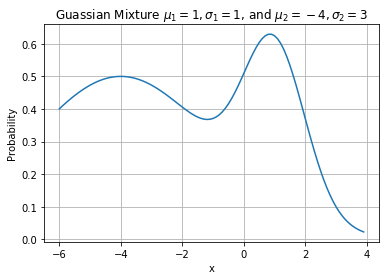

In [23]:
%matplotlib inline
from mltoolbox.draw.math import plotly_3d_functions
from mltoolbox.draw.math import plt_2d_functions
from plotly.offline import iplot
import numpy as np


def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

norm_mixture = lambda x: (gaussian(x, 1, 1) + gaussian(x, -4, 3)) / 2.0
plt_2d_functions([norm_mixture], np.arange(-6, 4, .1), 
                 title=r"Guassian Mixture $\mu_1=1, \sigma_1=1$, and $\mu_2=-4, \sigma_2=3$",
                 xlabel="x", ylabel="Probability")

Then suppose we wanted to find the probability of x occuring between -2 and 2. This would be the integral of the guassian mixture model we've plotted above between -2 and 2. In this case, we know the parameters of our probability distribution, we're able to estimate the probability given an event.

On the other hand, suppose now that we did not know the parameters of our model, and but we are able to observe a single instance of x. For example, say we observed x=2.5. This results in a liklihood function on $\sigma$. There are different values of $\sigma$ that are more likely to occur based on what the input is.

To visualize this, lets graph this as a function of theta, x. Both in 3d and contour form.

In [25]:
f_x_theta = lambda x, theta : (gaussian(x, 1, theta) + gaussian(x, -4, theta))/2
fig = plotly_3d_functions(f_x_theta, np.arange(-6, 4, .1), np.arange(.1, 4, .1), 
                          title="Guassian f(x;theta) centered around 1 and -4",
                          xaxis_title="x", yaxis_title="std", zaxis_title="f(x;theta)")
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]



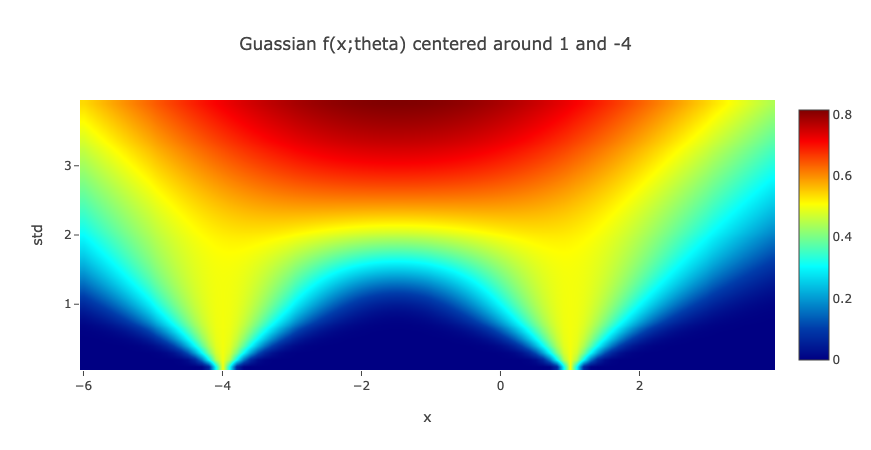

In [16]:
from mltoolbox.draw.math import plotly_2d_contours

fig = plotly_2d_contours([f_x_theta], np.arange(-6, 4, .1), np.arange(.1, 4, .1), 
                          title="Guassian f(x;theta) centered around 1 and -4",
                          xaxis1_title="x", yaxis1_title="std")
iplot(fig)

The likelihood function at x=2.5 would be $L(\theta, x=2.5)$

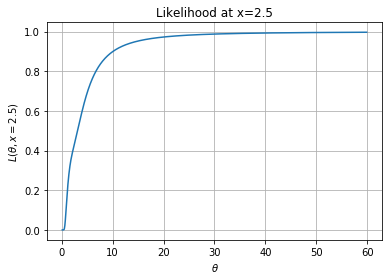

In [14]:
likelihood_x25 = lambda theta: (gaussian(2.5, 1, theta) + gaussian(2.5, -4, theta)) / 2
plt_2d_functions([likelihood_x25], np.arange(0.1, 60, .1), title="Likelihood at x=2.5",
                 xlabel=r"$\theta$", ylabel=r"$L(\theta, x=2.5)$")

????? think im grpahing wrong, try without a guassian mixture prob.?

....


What we should be able to identify is a value of $\theta$ that maximized the likelihood. If we want to do this efficiently, we find the point in the graph where it increases, and then decreases. In other words, the derivative of the function at 0.

What is typically done is that the log likelihood is maximized rather than the likelihood on its own. This is done for a few reasons.

1. Applying because the logarithm is always monotonically increasing, applying it on anything else will also make it monotontically increasing. And because of this, when taking the derivative, the answer doesn't change either. Taking the derivative of the log of a function is equivalent to taking the derivative of the original function.
2. The derivative simplifies a lot and the math becomes easier. For example, one of the properties that come useful is that the production of log variables is equivalent to the sum of each log variable. $log(ab)=log(a)+log(b)$.

Graphically, we've show that when x=2.5, the MLE, or the maximum likelihood estimation for theta is 1.5. The reason that we say estimation is because it is just that. There are potentially better ways of estimating parameter depending on the context, but this is just one of those ways.